# Chapter 22: Atomic Simulation Environment (ASE)

## Learning Objectives

By the end of this lecture, you should be able to:

1. Install and set up ASE for molecular simulations.
2. Create, visualize, and manipulate molecular structures using ASE.
3. Perform basic computational tasks such as optimizing molecular geometries and calculating energies.
4. Use ASE in conjunction with machine learning calculators like MACE.
5. Model adsorption phenomena on surfaces and perform molecular dynamics simulations.

## Introduction

The **Atomic Simulation Environment (ASE)** is a powerful Python library for setting up, manipulating, and analyzing atomistic simulations. ASE provides tools to create and visualize molecular structures, perform geometry optimizations, calculate energies and forces, and run molecular dynamics simulations. It serves as an interface to various computational chemistry codes and can be extended with custom calculators, making it a versatile tool for computational materials science and chemistry.

In this lecture, we'll explore how to use ASE for common tasks in computational chemistry, such as creating molecules, optimizing structures, and simulating adsorption on surfaces. We'll also see how ASE integrates with machine learning calculators like MACE to accelerate simulations.

## Installing ASE

ASE can be installed using `pip`:

```bash
pip install ase
```

Alternatively, if you're using Anaconda, you can install it via `conda`:

```bash
conda install -c conda-forge ase
```

## Creating a Molecule

Let's create a simple molecule using ASE. We'll start by creating a carbon monoxide (CO) molecule.

In [1]:
from ase import Atoms

# Create a CO molecule with specified positions
atoms = Atoms('CO', positions=[(0, 0, 0), (1.2, 0, 0)])

# Print the molecule's information
print(atoms)

Atoms(symbols='CO', pbc=False)


## Visualizing a Molecule

ASE can visualize molecules using Matplotlib. Let's visualize the CO molecule we created.

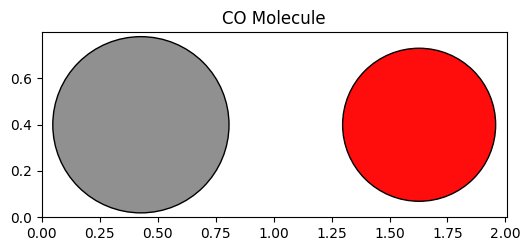

In [2]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

# Plot the molecule
fig, ax = plt.subplots(figsize=(6, 6))
plot_atoms(atoms, ax, radii=0.5)
ax.set_title('CO Molecule')
plt.show()

In [6]:
from ase.visualize import view
view(atoms, viewer='x3d')

## Writing a Molecule to a File

We can write the molecule to a file in various formats. Here, we'll write it to an XYZ file.

In [3]:
from ase.io import write

# Write the molecule to an XYZ file
write('CO.xyz', atoms)

````{note}
**CO.xyz**

```none
2
Properties=species:S:1:pos:R:3
C        0.00000000       0.00000000       0.00000000
O        1.20000000       0.00000000       0.00000000
```
````

## Reading a Molecule from a File

We can read the molecule back from the file we just created.

In [4]:
from ase.io import read

# Read the molecule from the XYZ file
atoms = read('CO.xyz')

# Print the molecule's information
print(atoms)

Atoms(symbols='CO', pbc=False)


## Using a Machine Learning Calculator: MACE

[MACE](https://arxiv.org/abs/2401.00096) is a higher-order equivariant message-passing neural network for fast and accurate force fields. We'll use MACE as a calculator in ASE.

First, install MACE:

```bash
pip install mace-torch
```

In [8]:
!pip install mace-torch

^C
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/109.3 MB 2.0 MB/s eta 0:00:55
   ---------------------------------------- 1.3/109.3 MB 2.2 MB/s eta 0:00:49
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 1.6/109

  DEPRECATION: Building 'python-hostlist' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'python-hostlist'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  You can safely remove it manually.
  You can safely remove it manually.


In [5]:
from mace.calculators import mace_mp

# Set up the MACE calculator
macemp = mace_mp()

# Attach the calculator to the molecule
atoms.calc = macemp

C:\Users\repti\anaconda3\envs\chem-4050\Lib\site-packages\e3nn\o3\_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with C:\Users\repti\.cache\mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


C:\Users\repti\anaconda3\envs\chem-4050\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head default out of ['default']
Default dtype float32 does not match model dtype float64, converting models to float32.


## Geometry Optimization

We can optimize the geometry of the CO molecule using the BFGS algorithm.

In [10]:
from ase.optimize import BFGS

# Optimize the molecule
opt = BFGS(atoms)
opt.run(fmax=0.05)

# Print the optimized bond length
bond_length = atoms.get_distance(0, 1)
print(f"Optimized C–O bond length: {bond_length:.3f} Å")

      Step     Time          Energy          fmax
BFGS:    0 11:07:56      -14.115524        5.456455
BFGS:    1 11:07:58      -13.657085       14.643243
BFGS:    2 11:07:58      -14.272179        1.783773
BFGS:    3 11:07:58      -14.286476        0.519234
BFGS:    4 11:07:58      -14.287725        0.028159
Optimized C–O bond length: 1.140 Å


The optimized bond length should be close to the experimental value of approximately 1.128 Å.

## Calculating the Atomization Energy

We can calculate the atomization energy of CO by comparing the total energy of the molecule to the energies of isolated atoms.

In [11]:
# Create isolated atoms
C = Atoms('C', positions=[(0, 0, 0)])
O = Atoms('O', positions=[(0, 0, 0)])

# Attach the calculator to the atoms
C.calc = macemp
O.calc = macemp

# Calculate the energies
E_CO = atoms.get_potential_energy()
E_C = C.get_potential_energy()
E_O = O.get_potential_energy()

# Print the energies
print(f"E_CO: {E_CO:.2f} eV")
print(f"E_C: {E_C:.2f} eV")
print(f"E_O: {E_O:.2f} eV")

# Calculate the atomization energy
atomization_energy = E_C + E_O - E_CO

print(f"Atomization Energy of CO: {atomization_energy:.2f} eV")

E_CO: -14.29 eV
E_C: -1.26 eV
E_O: -1.55 eV
Atomization Energy of CO: 11.48 eV


The atomization energy should be close to the experimental value of approximately 11.16 eV.

## Example: CO Adsorption on Pt(100)

Let's simulate the adsorption of CO on a platinum (Pt) (100) surface using ASE.

### Creating the Pt(100) Surface

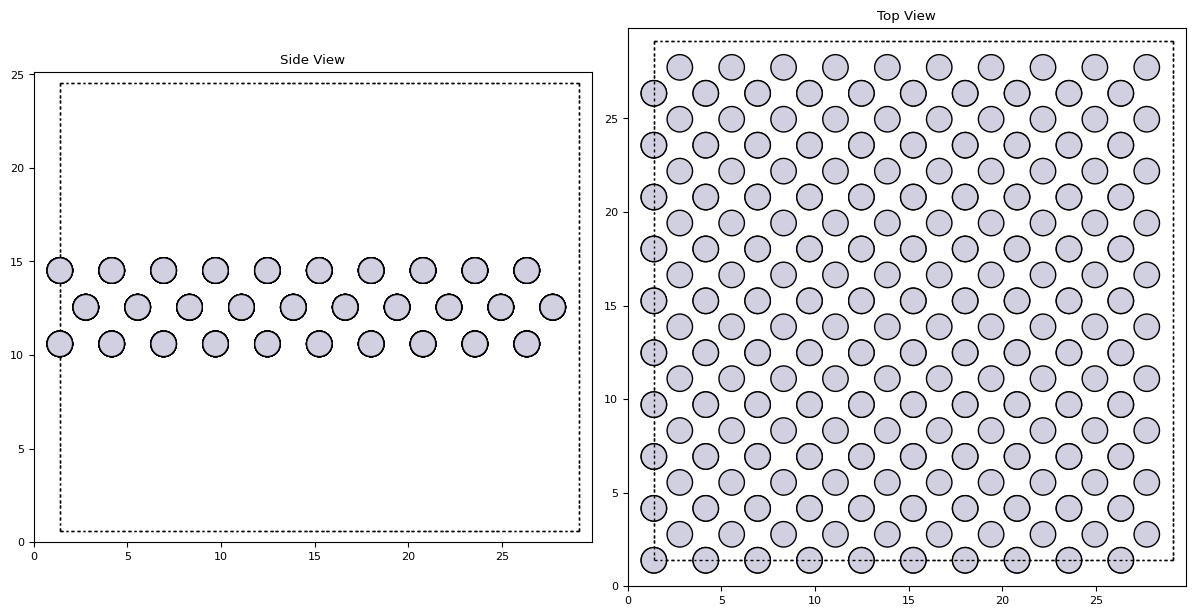

In [22]:
from ase.build import fcc100

# Create the Pt(100) surface with specified size and vacuum
slab = fcc100('Pt', size=(10, 10, 3), vacuum=10.0)

# Visualize the Pt(100) surface
fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
plot_atoms(slab, axs['side'], radii=0.5, rotation='90x,90y')
plot_atoms(slab, axs['top'], radii=0.5)
axs['side'].set_title('Side View')
axs['top'].set_title('Top View')
plt.tight_layout()
plt.show()

### Adding CO Adsorbate

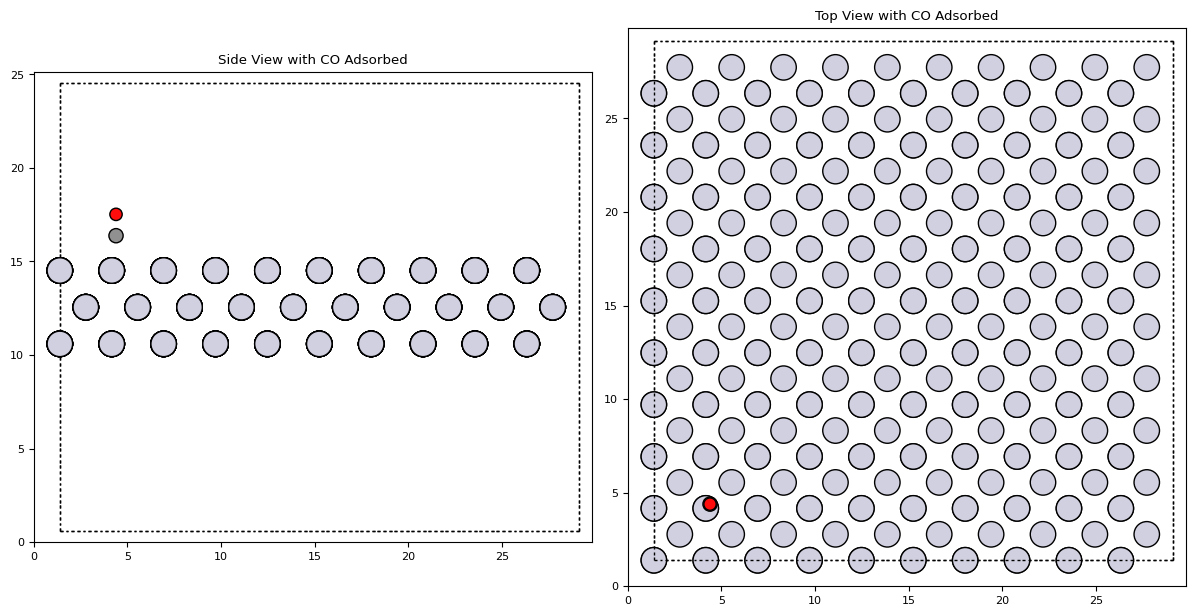

In [23]:
from ase.build import molecule
from ase.build.surface import add_adsorbate

# Create the CO molecule
co_molecule = molecule('CO')

# Adjust the position of CO
co_molecule.set_distance(0, 1, 1.14)

# Add the CO molecule to the Pt(100) surface
add_adsorbate(slab, co_molecule, height=3, position=(3, 3))

# Visualize the slab with CO adsorbed
fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
plot_atoms(slab, axs['side'], radii=0.5, rotation='-90x')
plot_atoms(slab, axs['top'], radii=0.5)
axs['side'].set_title('Side View with CO Adsorbed')
axs['top'].set_title('Top View with CO Adsorbed')
plt.tight_layout()
plt.show()

In [24]:
view(slab, viewer='x3d')

### Optimization of the Adsorbed System

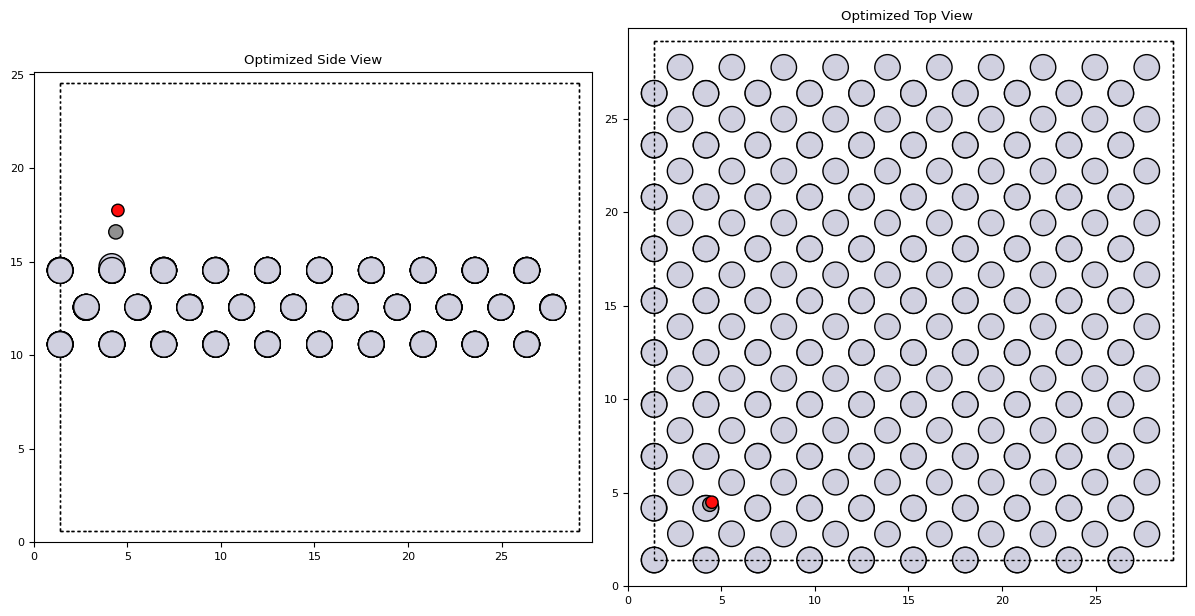

In [25]:
# Attach the calculator to the slab
slab.calc = macemp

# Optimize the slab with CO adsorbed
opt = BFGS(slab, logfile='Pt100_CO.log')
opt.run(fmax=0.05)

# Visualize the optimized structure
fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
plot_atoms(slab, axs['side'], radii=0.5, rotation='-90x')
plot_atoms(slab, axs['top'], radii=0.5)
axs['side'].set_title('Optimized Side View')
axs['top'].set_title('Optimized Top View')
plt.tight_layout()
plt.show()

## Calculating the Adsorption Energy

The adsorption energy can be calculated using the energies of the slab with and without CO, and the energy of the isolated CO molecule.

In [30]:
# Energy of the slab with CO adsorbed
E_slab_CO = slab.get_potential_energy()

# Create and calculate energy of the clean slab
slab_clean = fcc100('Pt', size=(10, 10, 3), vacuum=10.0)
slab_clean.calc = macemp

# Optimize the clean slab
opt_clean = BFGS(slab_clean)
opt_clean.run(fmax=0.05)

E_slab = slab_clean.get_potential_energy()

# Recalculate E_CO if needed
E_CO = atoms.get_potential_energy()

# Calculate the adsorption energy
adsorption_energy = E_slab_CO - E_slab - E_CO

print(f"Adsorption Energy: {adsorption_energy:.2f} eV")

      Step     Time          Energy          fmax
BFGS:    0 11:41:50    -1631.367188        0.112060
BFGS:    1 11:41:55    -1631.399902        0.100574
BFGS:    2 11:42:00    -1631.538086        0.002709
Adsorption Energy: -2.21 eV


The adsorption energy should be negative, indicating that adsorption is energetically favorable. The value should be in the range of approximately -1.73 eV to -1.64 eV, consistent with [computational data](https://www.catalysis-hub.org/).

## Example: Molecular Dynamics of CO on Pt(100)

We can perform molecular dynamics (MD) simulations to study the behavior of CO on the Pt(100) surface at finite temperatures.

### Setting Up Molecular Dynamics

ERROR! Session/line number was not unique in database. History logging moved to new session 360
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step
ran step


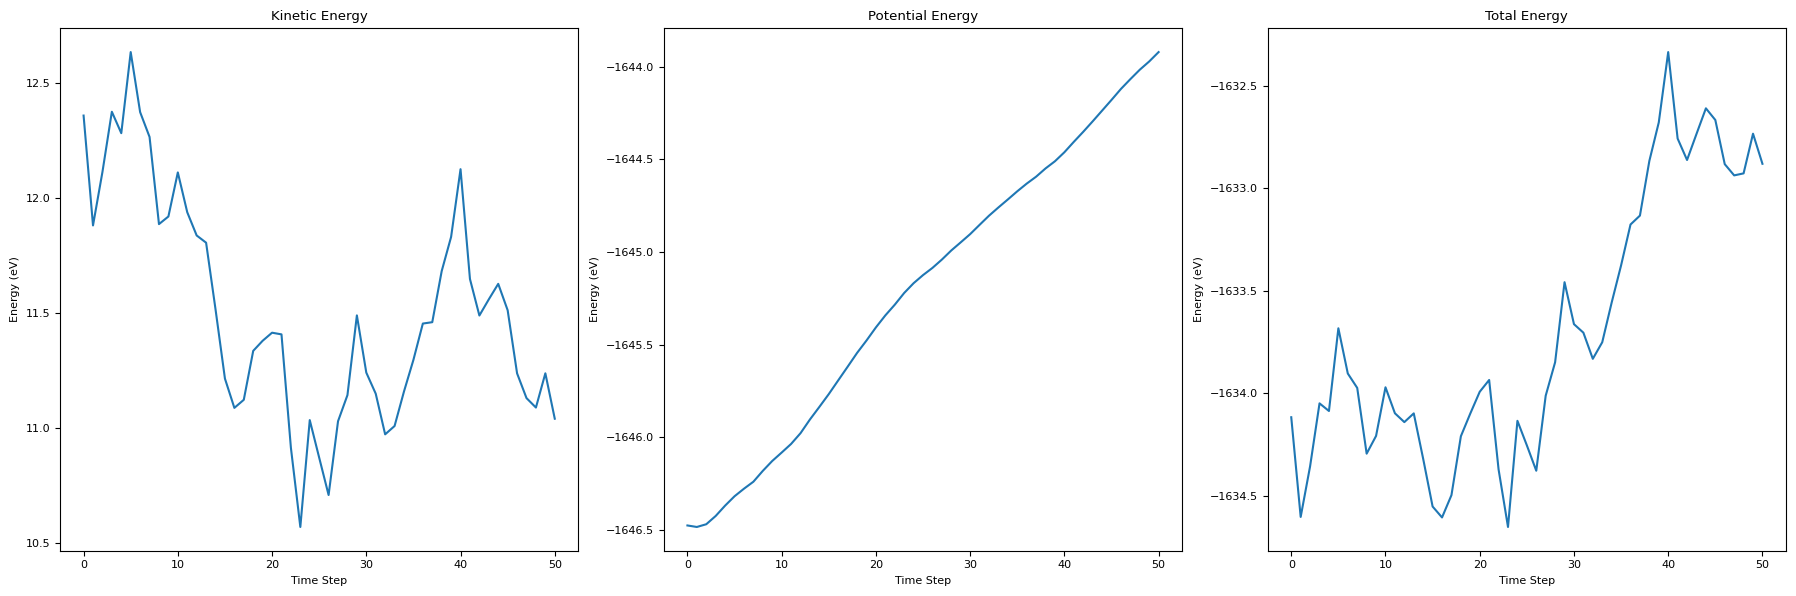

In [31]:
from ase import units
from ase.md.andersen import Andersen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
import matplotlib.pyplot as plt

# Set the temperature and time step
temperature = 300  # Kelvin
timestep = 1.0  # fs

# Initialize velocities according to the Maxwell-Boltzmann distribution
MaxwellBoltzmannDistribution(slab, temperature_K=temperature)

# Set up the Andersen dynamics
dyn = Andersen(slab, timestep * units.fs, temperature_K=temperature, andersen_prob=0.1)

# Lists to store energies
kinetic_energies = []
potential_energies = []
total_energies = []

# Function to store energies
def store_energies():
    kinetic_energy = slab.get_kinetic_energy()
    potential_energy = slab.get_potential_energy()
    total_energy = kinetic_energy + potential_energy
    kinetic_energies.append(kinetic_energy)
    potential_energies.append(potential_energy)
    total_energies.append(total_energy)
    print('ran step')

# Attach the function to the dynamics
dyn.attach(store_energies, interval=1)

# Run the MD simulation for 100 steps
dyn.run(50)

# Plot the energy during the simulation
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('Kinetic Energy')
axs[0].plot(kinetic_energies)
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Energy (eV)')

axs[1].set_title('Potential Energy')
axs[1].plot(potential_energies)
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Energy (eV)')

axs[2].set_title('Total Energy')
axs[2].plot(total_energies)
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Energy (eV)')

plt.tight_layout()
plt.show()

### Visualizing the MD Simulation

After the simulation, we can visualize the final configuration.

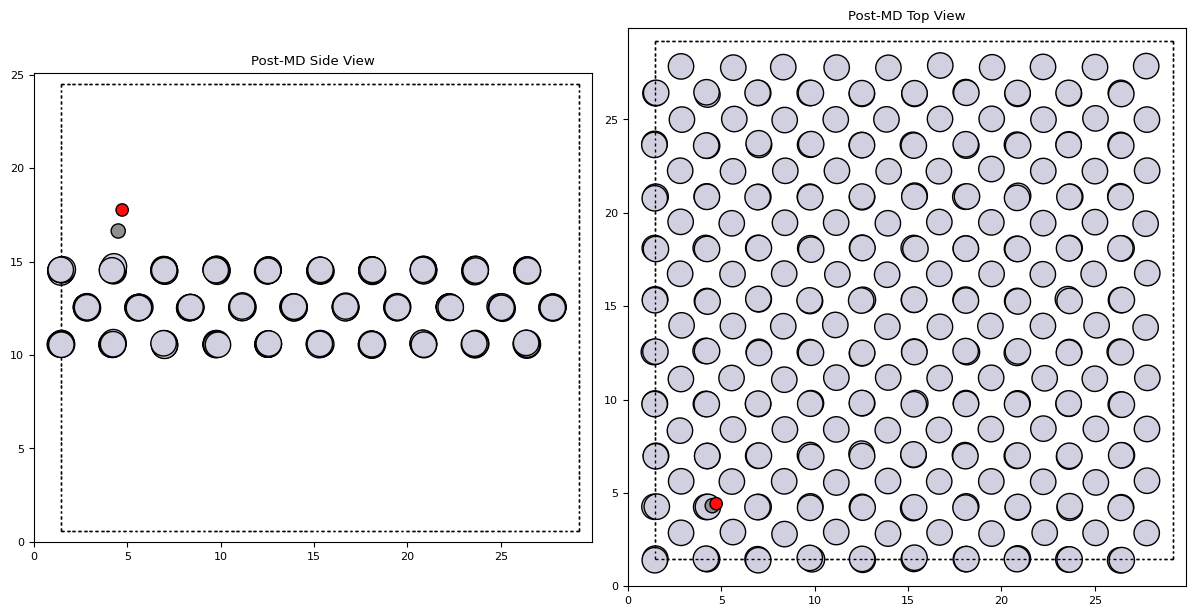

In [32]:
# Visualize the slab after MD simulation
fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
plot_atoms(slab, axs['side'], radii=0.5, rotation='-90x')
plot_atoms(slab, axs['top'], radii=0.5)
axs['side'].set_title('Post-MD Side View')
axs['top'].set_title('Post-MD Top View')
plt.tight_layout()
plt.show()

## Summary

In this lecture, we explored the Atomic Simulation Environment (ASE) and its capabilities for molecular modeling and simulations. We learned how to:

- Install and set up ASE for simulations.
- Create and visualize molecular structures.
- Write and read molecular data to and from files.
- Use machine learning calculators like MACE for efficient computations.
- Perform geometry optimizations and calculate energies, such as atomization and adsorption energies.
- Model surface phenomena like CO adsorption on Pt(100).
- Conduct molecular dynamics simulations to study temperature-dependent behavior.

ASE provides a flexible and powerful framework for computational studies in chemistry and materials science, allowing researchers to perform a wide range of simulations with ease.